<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ehsan Merrikhi

**Student ID**: 400101967



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

This dataset contains information about housing in Boston.
It has 14 different features someone needs to about housing.

    1-CRIM: Per capita crime rate by town
    2-ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
    3-INDUS: Proportion of non-retail business acres per town
    4-CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    5-NOX: Nitric oxides concentration (parts per 10 million)
    6-RM: Average number of rooms per dwelling
    7-AGE: Proportion of owner-occupied units built prior to 1940
    8-DIS: Weighted distances to five Boston employment centers
    9-RAD: Index of accessibility to radial highways
    10-TAX: Full-value property-tax rate per $10,000
    11-PTRATIO: Pupil-teacher ratio by town
    12-B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13-LSTAT: Percentage of lower status of the population
    14-MEDV: Median value of owner-occupied homes in $1000's
The dataset has 506 observations and 14 features. Therefore, the shape of the dataset is 506x14.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [4]:
data = pd.read_csv('Boston.csv')
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_prediction = linear_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_prediction)
train_RMSE = root_mean_squared_error(y_train, y_train_prediction)

y_test_pred = linear_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_RMSE = root_mean_squared_error(y_test, y_test_pred)

print('Linear Regression Model:')
print(f'Training R^2: {train_r2:.6f}')
print(f'Training RMSE: {train_RMSE:.6f}')
print(f'Test R^2: {test_r2:.6f}')
print(f'Test RMSE: {test_RMSE:.6f}')
print('\nCoefficients:')
print(linear_model.coef_)

Linear Regression Model:
Training R^2: 0.744042
Training RMSE: 4.822115
Test R^2: 0.657269
Test RMSE: 4.229972

Coefficients:
[-1.21523752e-01  4.41690292e-02  3.13126315e-03  2.65717987e+00
 -1.66074012e+01  4.05861759e+00  8.27204005e-03 -1.45733917e+00
  3.32763774e-01 -1.18351189e-02 -1.03044635e+00  9.02440463e-03
 -5.59514954e-01]


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [8]:
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

ridge_train_MSE = []
ridge_test_MSE = []
ridge_coeffs = []
num_non_zero_coeffs = []

for alpha in alphas:
    
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)

    y_train_pred = ridge.predict(X_train)
    ridge_train_MSE.append(root_mean_squared_error(y_train, y_train_pred))

    y_test_pred = ridge.predict(X_test)
    ridge_test_MSE.append(root_mean_squared_error(y_test, y_test_pred))

    ridge_coeffs.append(ridge.coef_)
    num_non_zero_coeffs.append(np.sum(ridge.coef_ != 0))

optimal_alpha_idx = np.argmin(ridge_test_MSE)
optimal_alpha = alphas[optimal_alpha_idx]

ridge_optimal = Ridge(alpha=optimal_alpha)
ridge_optimal.fit(X_train, y_train)

y_train_pred = ridge_optimal.predict(X_train)
train_rmse = np.sqrt(root_mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = ridge_optimal.predict(X_test)
test_rmse = np.sqrt(root_mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f'Optimal alpha: {optimal_alpha:.6f}')
print(f'Training RMSE: {train_rmse:.6f}')
print(f'Training R^2: {train_r2:.6f}')
print(f'Test RMSE: {test_rmse:.6f}')
print(f'Test R^2: {test_r2:.6f}')
print('Coefficients:')
print(ridge_optimal.coef_)

Optimal alpha: 0.000500
Training RMSE: 2.195932
Training R^2: 0.744042
Test RMSE: 2.056696
Test R^2: 0.657265
Coefficients:
[-1.21520423e-01  4.41693107e-02  3.10472458e-03  2.65705873e+00
 -1.66005941e+01  4.05865326e+00  8.26615338e-03 -1.45723258e+00
  3.32751853e-01 -1.18359148e-02 -1.03036787e+00  9.02468584e-03
 -5.59526055e-01]


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

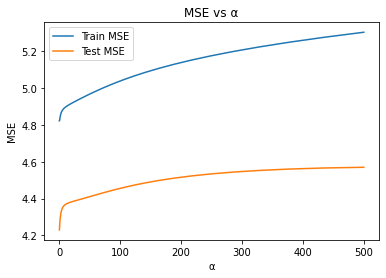

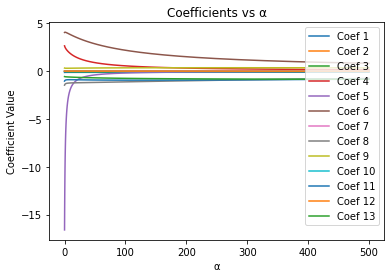

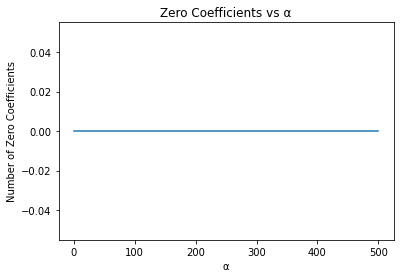

In [11]:
plt.figure()
plt.plot(alphas, ridge_train_MSE, label='Train MSE')
plt.plot(alphas, ridge_test_MSE, label='Test MSE')
plt.title('MSE vs α')
plt.xlabel('α')
plt.ylabel('MSE')
plt.legend()
plt.show()


plt.figure()
for i in range(13):
    plt.plot(alphas, [coef[i] for coef in ridge_coeffs], label=f'Coef {i+1}')
plt.xlabel('α')
plt.ylabel('Coefficient Value')
plt.legend()
plt.title('Coefficients vs α')
plt.show()


plt.figure()
num_zero_coefs = [np.count_nonzero(coef==0) for coef in ridge_coeffs]
plt.plot(alphas, num_zero_coefs)
plt.xlabel('α')
plt.ylabel('Number of Zero Coefficients')
plt.title('Zero Coefficients vs α')
plt.show()

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.697e+03, tolerance: 3.670e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the sol

Optimal alpha: 0.00
Training RMSE: 2.20
Training R^2: 0.74
Test RMSE: 2.06
Test R^2: 0.66
Coefficients:
[-1.21523752e-01  4.41690292e-02  3.13126315e-03  2.65717987e+00
 -1.66074012e+01  4.05861759e+00  8.27204005e-03 -1.45733917e+00
  3.32763774e-01 -1.18351189e-02 -1.03044635e+00  9.02440463e-03
 -5.59514954e-01]


c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.697e+03, tolerance: 3.670e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the sol

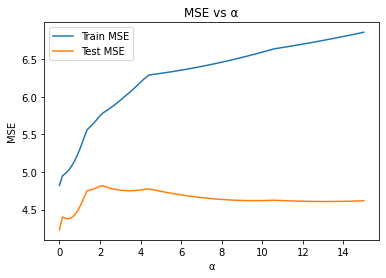

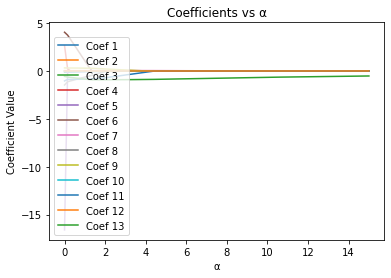

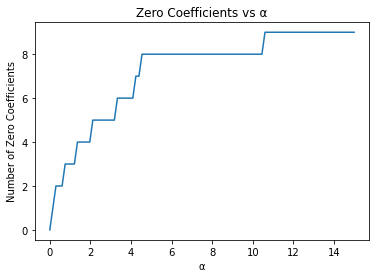

In [9]:
alphas = 10 * np.linspace(0, 3, 100) * 0.5

lasso_train_MSE = []
lasso_test_MSE = []
lasso_coeffs = []
num_non_zero_coeffs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    y_train_pred = lasso.predict(X_train)
    lasso_train_MSE.append(root_mean_squared_error(y_train, y_train_pred))

    y_test_pred = lasso.predict(X_test)
    lasso_test_MSE.append(root_mean_squared_error(y_test, y_test_pred))

    lasso_coeffs.append(lasso.coef_)
    num_non_zero_coeffs.append(np.sum(lasso.coef_ != 0))

optimal_alpha_idx = np.argmin(lasso_test_MSE)
optimal_alpha = alphas[optimal_alpha_idx]

lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train, y_train)

y_train_pred = lasso_optimal.predict(X_train)
train_rmse = np.sqrt(root_mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = lasso_optimal.predict(X_test)
test_rmse = np.sqrt(root_mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f'Optimal alpha: {optimal_alpha:.2f}')
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Training R^2: {train_r2:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R^2: {test_r2:.2f}')
print('Coefficients:')
print(lasso_optimal.coef_)

plt.figure()
plt.plot(alphas, lasso_train_MSE, label='Train MSE')
plt.plot(alphas, lasso_test_MSE, label='Test MSE')
plt.title('MSE vs α')
plt.xlabel('α')
plt.ylabel('MSE')
plt.legend()
plt.show()


plt.figure()
for i in range(13):
    plt.plot(alphas, [coef[i] for coef in lasso_coeffs], label=f'Coef {i+1}')
plt.xlabel('α')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs α')
plt.legend()
plt.show()


plt.figure()
num_zero_coefs = [np.count_nonzero(coef==0) for coef in lasso_coeffs]
plt.plot(alphas, num_zero_coefs)
plt.xlabel('α')
plt.ylabel('Number of Zero Coefficients')
plt.title('Zero Coefficients vs α')
plt.show()

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

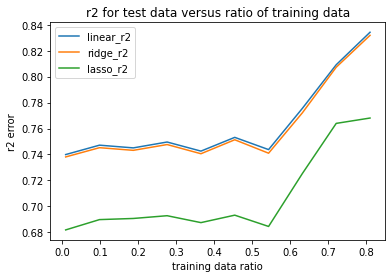

In [22]:
test_size = np.linspace(0.01, 0.81, 10)

linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

plt.figure()

linear_r2 = []
ridge_r2 = []
lasso_r2 = []

for x in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=67)

    linear_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    lasso_model.fit(X_train, y_train)

    y_linear_train_prediction = linear_model.predict(X_train)
    y_ridge_train_prediction = ridge_model.predict(X_train)
    y_lasso_train_prediction = lasso_model.predict(X_train)

    train_linear_r2 = r2_score(y_train, y_linear_train_prediction)
    linear_r2.append(train_linear_r2)

    train_ridge_r2 = r2_score(y_train, y_ridge_train_prediction)
    ridge_r2.append(train_ridge_r2)

    train_lasso_r2 = r2_score(y_train, y_lasso_train_prediction)
    lasso_r2.append(train_lasso_r2)
    

plt.plot(test_size, linear_r2, label='linear_r2')
plt.plot(test_size, ridge_r2, label='ridge_r2')
plt.plot(test_size, lasso_r2, label='lasso_r2')

plt.title('r2 for test data versus ratio of training data')
plt.xlabel('training data ratio')
plt.ylabel('r2 error')
plt.legend()
plt.show()

    
